In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import helper

In [2]:
window_size = 100
batch_size = 10

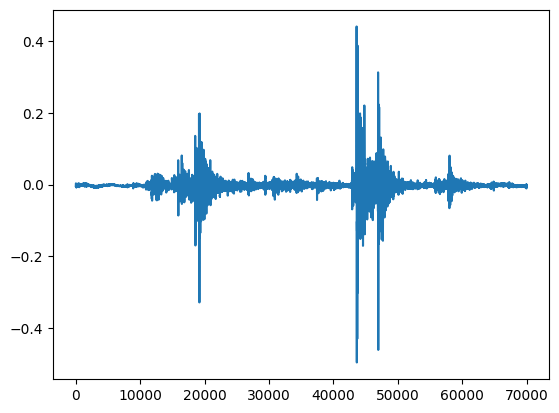

In [3]:
sample_data = np.loadtxt("datasets/sample_data.txt")[30000:100000]/4e6
plt.plot(sample_data)

In [7]:
windows,labels = helper.make_windows(sample_data,window_size,batch_size)
windows.shape,labels.shape

((69891, 100), (69891, 10))

In [4]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [5]:
inputs = tf.keras.layers.Input(shape=(window_size))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1))(inputs)
#x = tf.keras.layers.LSTM(128,return_sequences=True)(x)
x = tf.keras.layers.LSTM(128,activation="relu")(x)
#x = tf.keras.layers.Dense(32,activation="relu")(x)
output = tf.keras.layers.Dense(batch_size,activation="linear")(x)
model = tf.keras.Model(inputs=inputs,outputs=output)
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 lambda (Lambda)             (None, 100, 1)            0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 67,850
Trainable params: 67,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(windows,labels,epochs=100,validation_split=0.1,callbacks=[es])

Epoch 1/100
1966/1966 [==============================] - 115s 57ms/step - loss: 2.1886e-04 - val_loss: 8.9484e-06
Epoch 2/100
1966/1966 [==============================] - 109s 55ms/step - loss: 1.5049e-04 - val_loss: 1.3981e-05
Epoch 3/100
1966/1966 [==============================] - 111s 56ms/step - loss: 1.3343e-04 - val_loss: 6.1078e-06
Epoch 4/100
1966/1966 [==============================] - 109s 55ms/step - loss: 1.3289e-04 - val_loss: 7.1690e-06
Epoch 5/100
1966/1966 [==============================] - 110s 56ms/step - loss: 1.2092e-04 - val_loss: 6.2971e-06
Epoch 6/100
1966/1966 [==============================] - 110s 56ms/step - loss: 1.1821e-04 - val_loss: 5.4714e-06
Epoch 7/100
1966/1966 [==============================] - 110s 56ms/step - loss: 0.0013 - val_loss: 4.8677e-06
Epoch 8/100
1966/1966 [==============================] - 116s 59ms/step - loss: 1.1999e-04 - val_loss: 4.9175e-06
Epoch 9/100
1966/1966 [==============================] - 110s 56ms/step - loss: 1.1863e-04 -

In [9]:
model.predict(windows)

2185/2185 [==============================] - 54s 24ms/step


array([[-0.00512562, -0.00431895, -0.00466802, ..., -0.00735828,
        -0.00762598, -0.00840861],
       [-0.00495076, -0.00418669, -0.00461944, ..., -0.00766326,
        -0.00791368, -0.00869021],
       [-0.00493989, -0.00421952, -0.00475003, ..., -0.00810702,
        -0.00835428, -0.00914101],
       ...,
       [-0.00579618, -0.00508966, -0.0057523 , ..., -0.0081387 ,
        -0.00888962, -0.00936307],
       [-0.00385214, -0.00283079, -0.00280475, ..., -0.00361499,
        -0.00444117, -0.00515815],
       [-0.00211728, -0.00089184, -0.00051628, ..., -0.00120074,
        -0.00191875, -0.00279055]], dtype=float32)